In [235]:
import pickle
import cv2
#import matplotlib.pyplot as plt
import cvlib as cv
#from cvlib.object_detection import draw_bbox
import glob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import  matplotlib.pyplot as  plt



In [236]:
labels = [line.rstrip('\n') for line in open('labels.txt', 'r')]
vectorizer = CountVectorizer()
x1= vectorizer.fit(labels)
x2=vectorizer.transform(labels).toarray()

def getVector(labels):
    t=vectorizer.transform(set(labels)).toarray().sum(axis=0)
    t1=t*1000
    t2=t1+1
    return t2


In [237]:
path = "E:/IIT/Internship/DATASET/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train/Train001/"
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [172]:
frames=[]
label_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
    label_arr.append(t)
#    output_image = draw_bbox(t1, bbox, label, conf)
#    plt.imshow(output_image)
#    plt.show()



In [184]:
X_train = np.array(label_arr)
print("Model is Training.......")
gmm= GaussianMixture(20) 
gmm.fit(X_train)

Model is Training.......


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [145]:
filename1 = 'obj_gmm.sav'
filename2 = 'vectorized.sav'
pickle.dump(gmm, open(filename1, 'wb'))
pickle.dump(vectorizer, open(filename2, 'wb'))
print("Model saved")
avg=X_train.sum(axis=0)/92

Model saved


# Testing 

In [185]:
filename1 = 'obj_gmm.sav'
filename2 = 'vectorized.sav'
gmm = pickle.load(open(filename1, 'rb'))
vectorizer= pickle.load(open(filename2, 'rb'))
print("model loaded" )

model loaded


In [187]:
path = "E:/IIT/Internship/DATASET/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test001/"
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [188]:
frames=[]
label_arr=[]
value_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
#    plt.imshow(img)
#    plt.show()
    if i%10==0:
        print(i)
#         print(i," ---->  ",gmm.score([t]))
    value_arr.append(gmm.score([t]))
    label_arr.append(t)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [192]:
X_test = np.array(label_arr)

In [211]:
y_test =[]
for i in range(1,201):
    if i in range(90,153):  # specify in the data set 1 for anomaly,0 for normal
        y_test.append(1)
    else:
        y_test.append(0)


In [238]:
mu  = np.mean(value_arr)
sigma= np.var(value_arr)
z_score = value_arr-mu / sigma

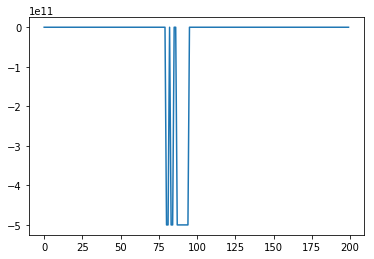

In [214]:
#plt.plot(value_arr)

In [222]:
th = -5*1e11   #threshold 
y_pred= (z_score <th)*1

Area under the Receiver Operating Characteristic curve: 0.5257212374000696


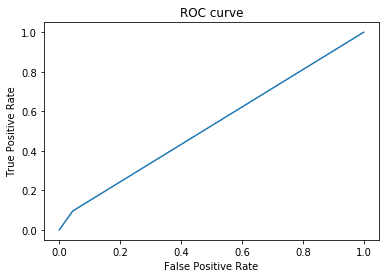

In [239]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred))
    


In [223]:
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [224]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
